## Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

    1. Crosstab Analysis:

        - Create a crosstab between the product category and the isBestSeller status.

        - Are there categories where being a best-seller is more prevalent?

        Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

    2. Statistical Tests:
        - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
        - Compute Cramér's V to understand the strength of association between best-seller status and category.

    3. Visualizations:
        - Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = '../../ih-labs/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file_path)

In [18]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [19]:
# Asegúrate de que 'product_category' y 'isBestSeller' son columnas en tu DataFrame
# Supongamos que 'isBestSeller' es una columna booleana donde True indica que el producto es un best-seller

# Crea una tabla de contingencia entre la categoría del producto y el estado de best-seller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calcula la proporción de best-sellers para cada categoría
crosstab['proportion_best_sellers'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Ordena las categorías en función de esta proporción en orden descendente
sorted_categories = crosstab['proportion_best_sellers'].sort_values(ascending=False)

print(sorted_categories)


category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: proportion_best_sellers, Length: 296, dtype: float64


In [22]:
# Create a contingency table between product category and best-seller status
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Conduct Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square test statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295
Expected frequencies:
[[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.13135755e-01]
 [9.4

In [23]:
# Compute Cramér's V using the 'association' function from scipy.stats.contingency
cramers_v = association(crosstab, method="cramer")

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.1222829439760564


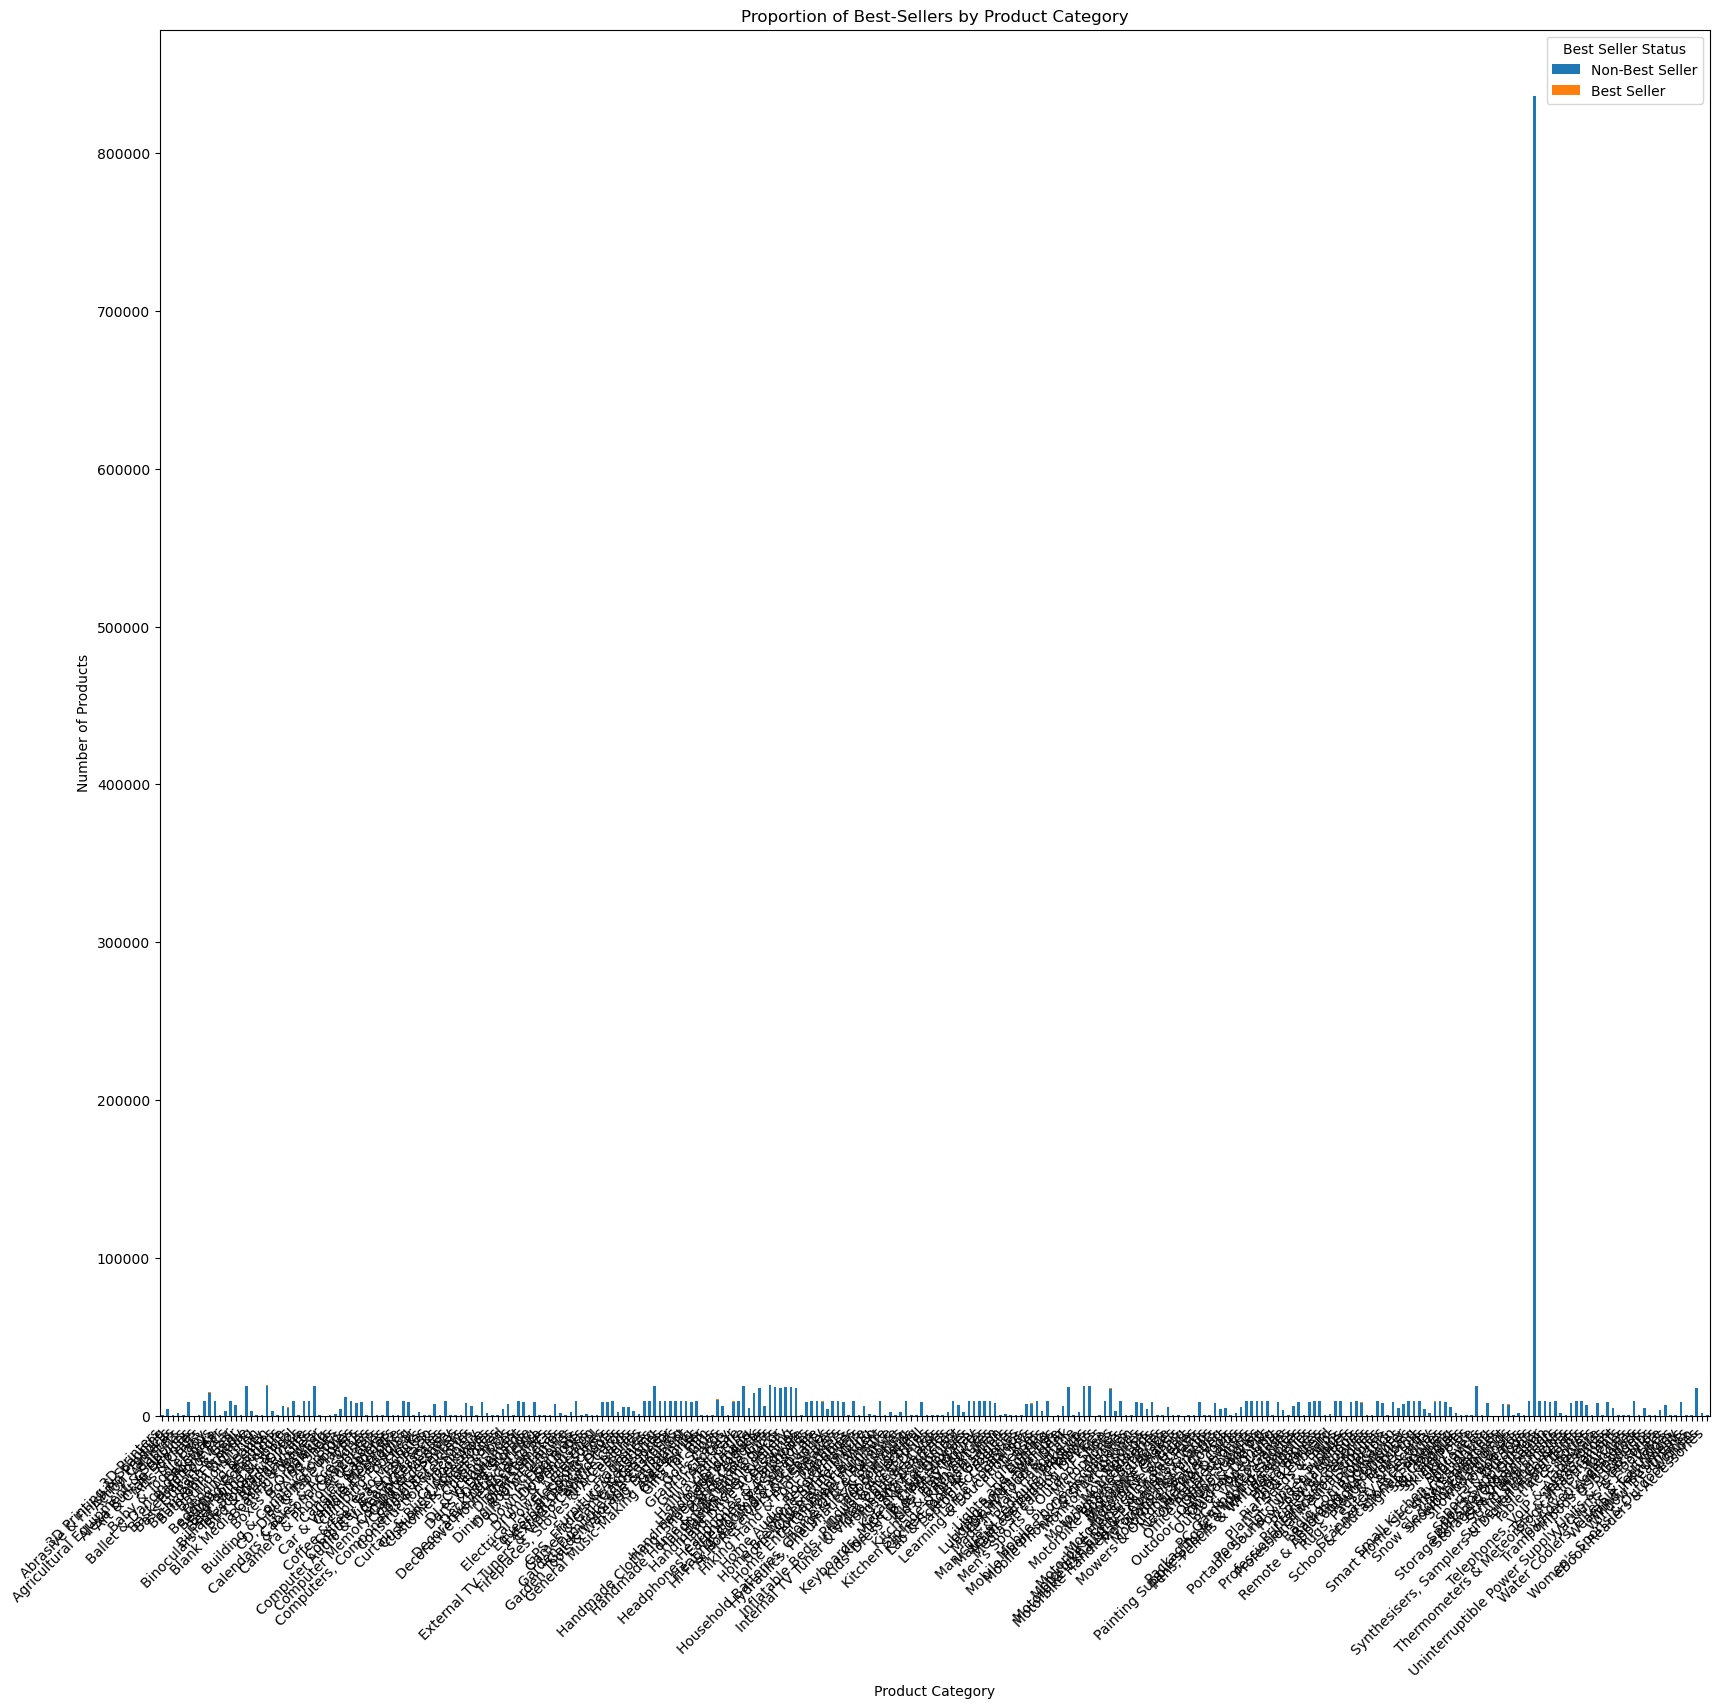

In [25]:
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(20, 18), color=['#1f77b4', '#ff7f0e'])
plt.title('Proportion of Best-Sellers by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Best Seller Status', labels=['Non-Best Seller', 'Best Seller'])
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

    0. Preliminary Step: Remove outliers in product prices.

    - For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

    Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

    1. Violin Plots:
        - Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
        - Which product category tends to have the highest median price? Don't filter here by top categories.

    2. Bar Charts:
        - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
        - Which product category commands the highest average price? Don't filter here by top categories.

    3. Box Plots:
        - Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
        - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [26]:
# Calculate the IQR for product prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original dataset size: {df.shape}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape}")

Original dataset size: (2443651, 9)
Dataset size after removing outliers: (2115963, 9)


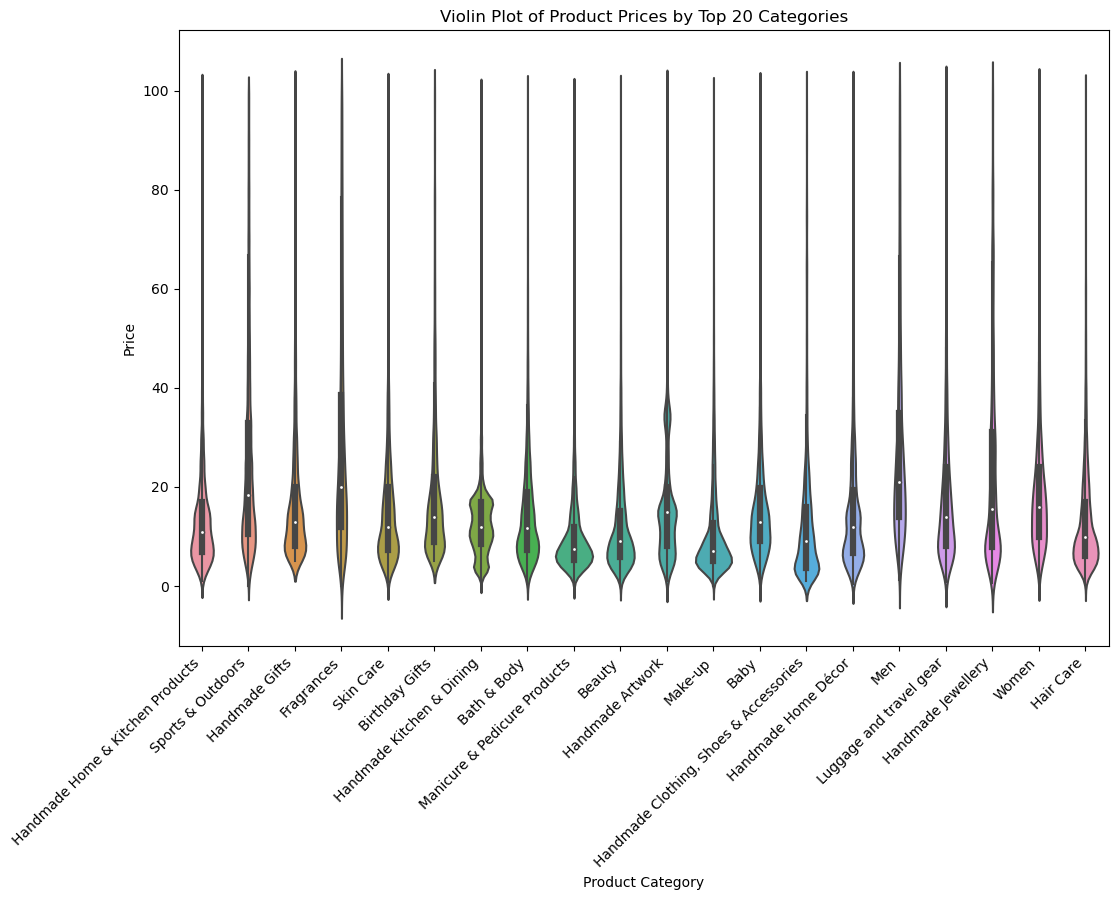

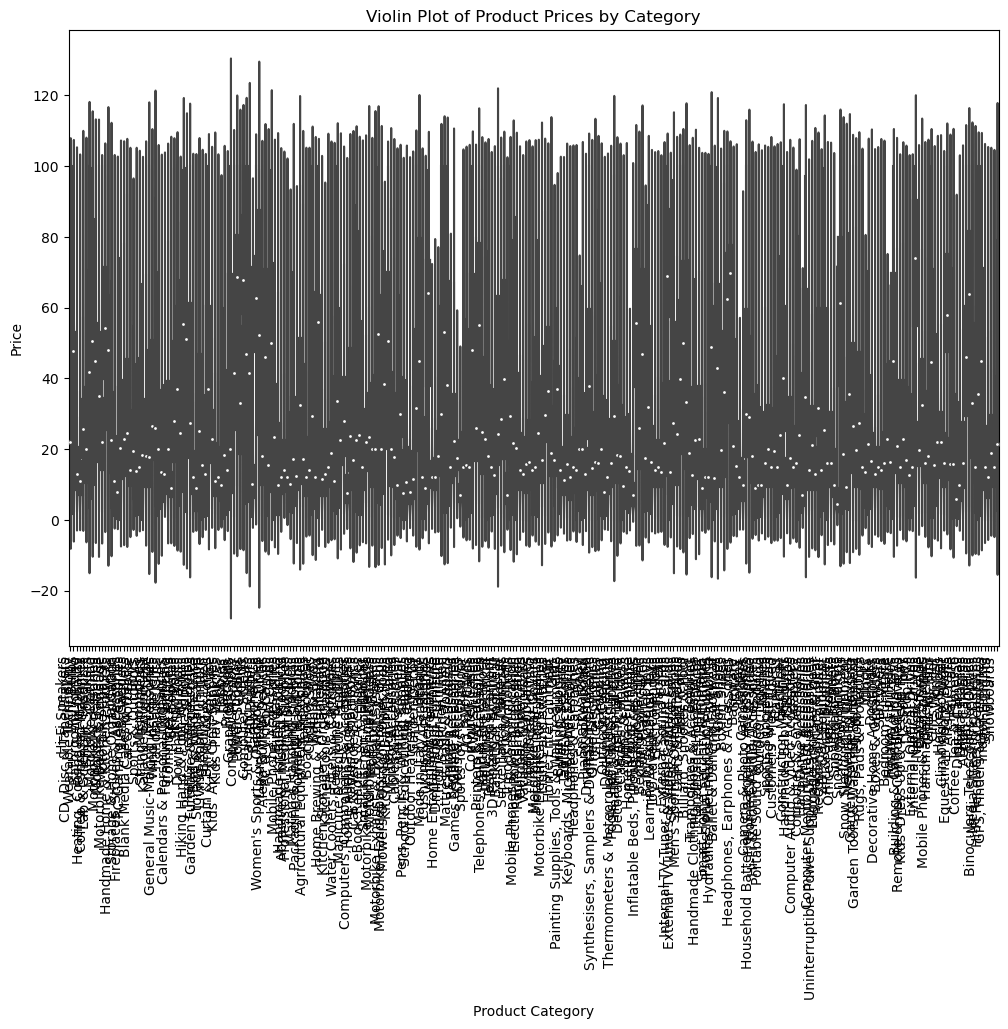

The category with the highest median price is 'Desktop PCs' with a median price of 74.00.


In [28]:
import seaborn as sns
# Filter the top 20 categories based on count
top_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

# Violin plot for top 20 categories
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_categories)
plt.title('Violin Plot of Product Prices by Top 20 Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Violin plot for all categories to determine highest median price category
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_no_outliers)
plt.title('Violin Plot of Product Prices by Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=90, ha='right')
plt.show()

# Determine which category has the highest median price
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"The category with the highest median price is '{highest_median_category}' with a median price of {highest_median_price:.2f}.")

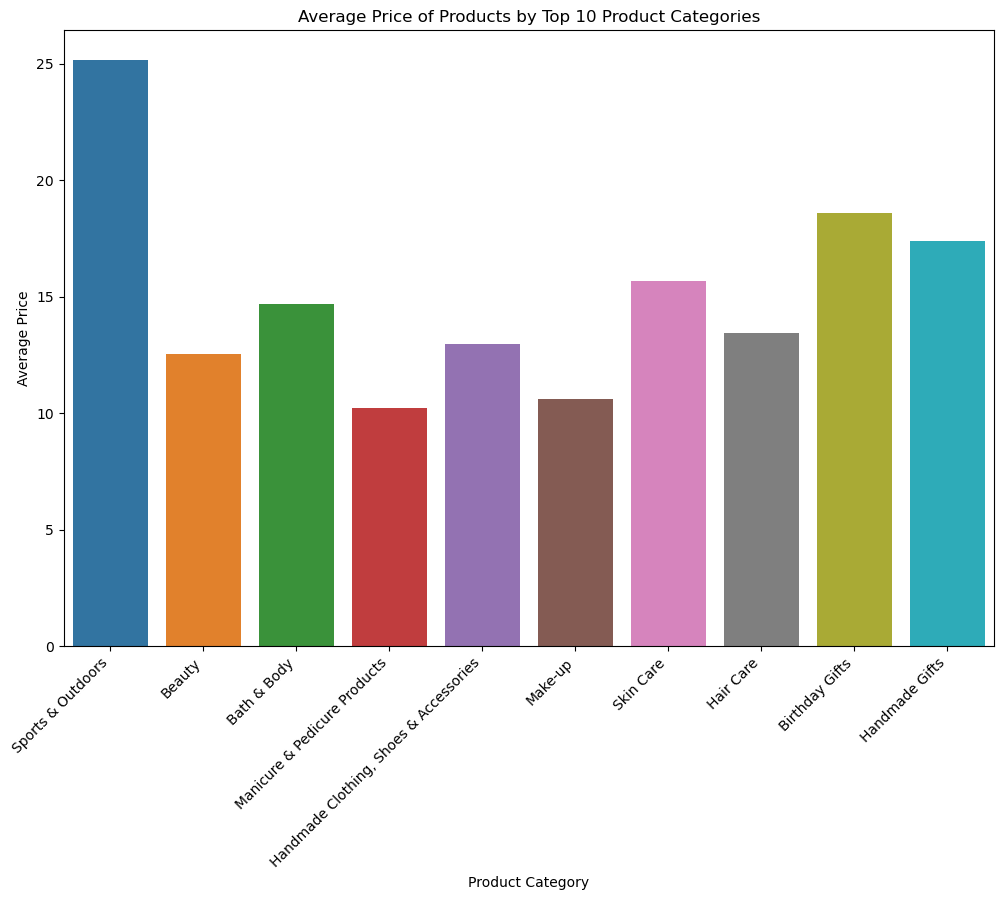

In [29]:
# Calculate the average price for each category
average_prices = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)

# Identify the top 10 categories based on the count of products
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
average_prices_top_10 = average_prices.loc[top_10_categories]

# Create a bar chart for the top 10 categories based on average price
plt.figure(figsize=(12, 8))
sns.barplot(x=average_prices_top_10.index, y=average_prices_top_10.values)
plt.title('Average Price of Products by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
# Determine which category commands the highest average price (not limited to top categories)
highest_average_category = average_prices.idxmax()
highest_average_price = average_prices.max()

print(f"The category with the highest average price is '{highest_average_category}' with an average price of {highest_average_price:.2f}.")

The category with the highest average price is 'Motherboards' with an average price of 68.77.


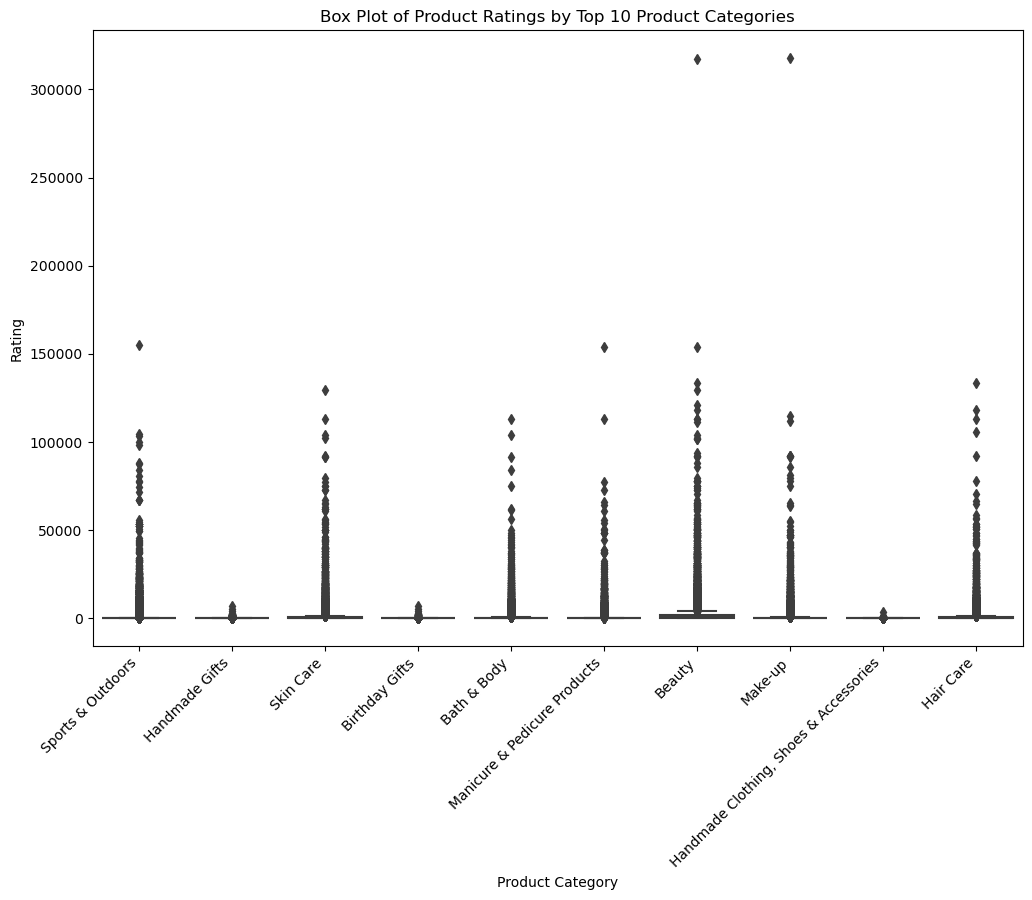

In [34]:
# Filter the top 10 categories based on count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top_10_categories = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Box plot for top 10 categories based on product ratings
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='reviews', data=df_top_10_categories)
plt.title('Box Plot of Product Ratings by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


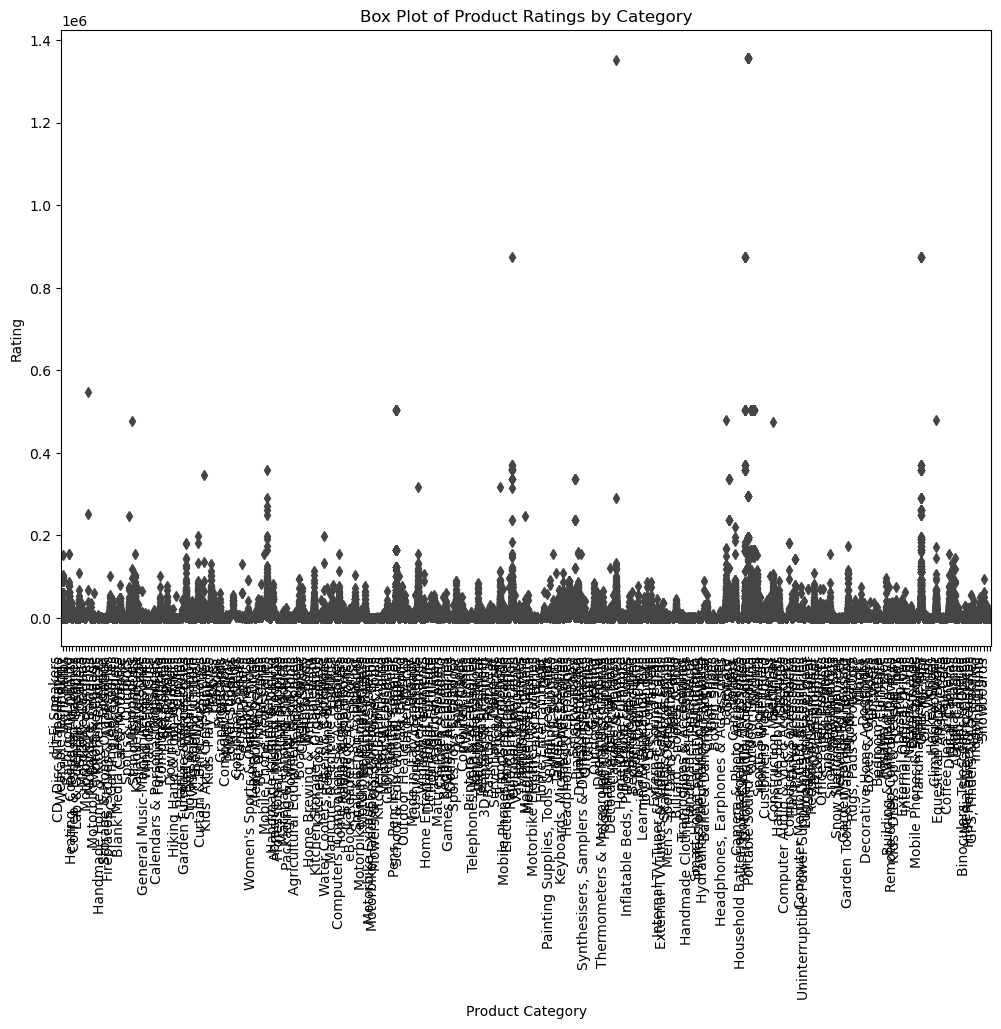

In [36]:
# Box plot for all categories to determine the highest median rating category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='reviews', data=df_no_outliers)
plt.title('Box Plot of Product Ratings by Category')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=90, ha='right')
plt.show()

In [37]:
# Determine which category has the highest median rating
median_ratings = df_no_outliers.groupby('category')['reviews'].median().sort_values(ascending=False)
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"The category with the highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating:.2f}.")

The category with the highest median rating is 'Computer Memory' with a median rating of 1894.00.


## Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

    1. Correlation Coefficients:
        - Calculate the correlation coefficient between price and stars.
        - Is there a significant correlation between product price and its rating?

    2. Visualizations:
        - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
        - Use a correlation heatmap to visualize correlations between all numerical variables.
        - Examine if product prices typically follow a normal distribution using a QQ plot.


In [40]:
from scipy.stats import pearsonr
# Calculate the Pearson correlation coefficient between price and rating
correlation, p_value = pearsonr(df_no_outliers['price'], df_no_outliers['reviews'])

print(f"Pearson correlation coefficient between price and rating: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

# Interpretation of the correlation
if p_value < 0.05:
    print("There is a statistically significant correlation between product price and rating.")
else:
    print("There is no statistically significant correlation between product price and rating.")


Pearson correlation coefficient between price and rating: -0.01
P-value: 4.24e-35
There is a statistically significant correlation between product price and rating.


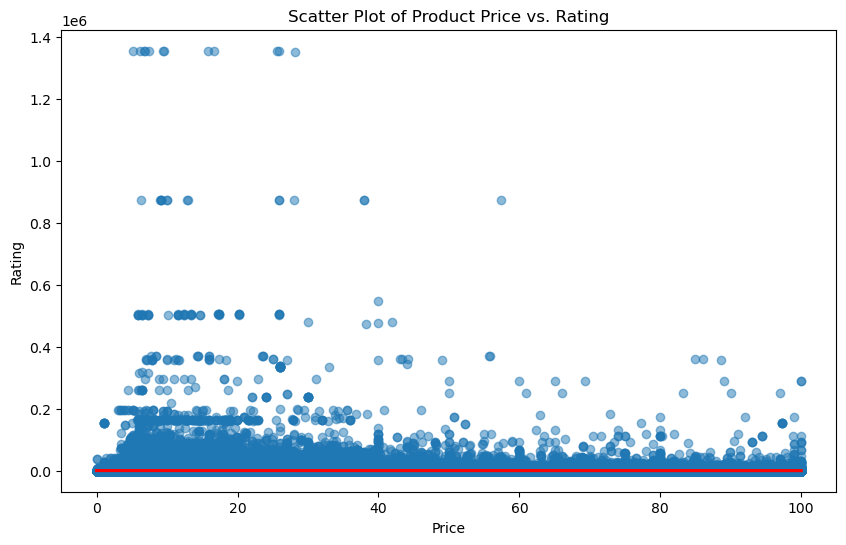

In [42]:
# Scatter plot with a regression line to visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='reviews', data=df_no_outliers, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of Product Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

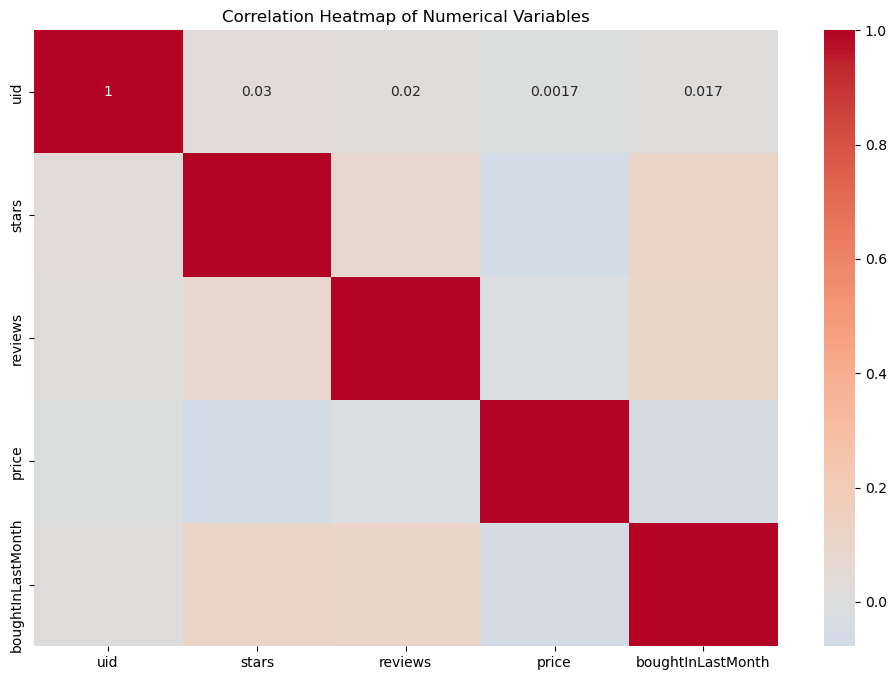

In [44]:
# Select only the numeric columns
numeric_df = df_no_outliers.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap of all numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


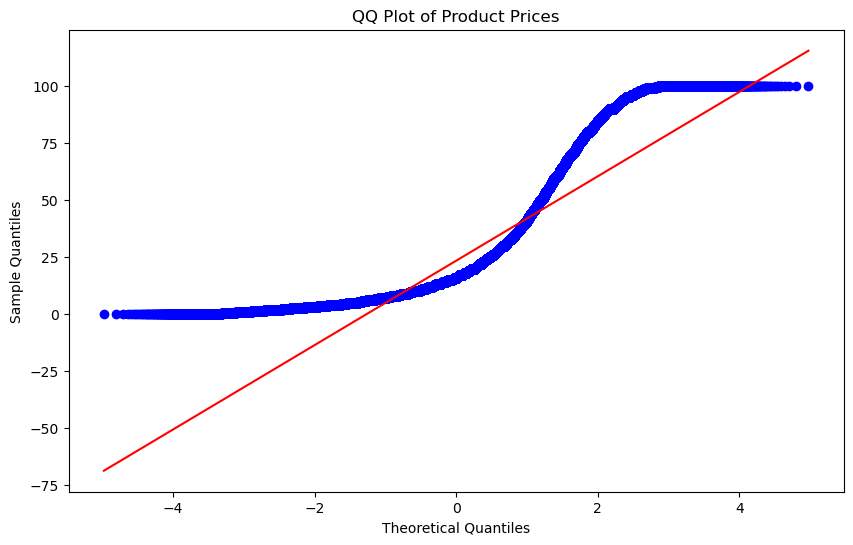

In [48]:
# QQ plot to examine if product prices follow a normal distribution
import scipy.stats as st
plt.figure(figsize=(10, 6))
st.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()